# 01. Data Preprocessing and Exploration
https://www.kaggle.com/datasets/venky73/spam-mails-dataset/code

## Dataset Collection

### Importing pandas

In [1]:
import pandas as pd

In [2]:
pwd

'c:\\Users\\anike\\Downloads\\Placewit-ML-February2023-main\\Placewit-ML-February2023-main\\Assignments\\Internship Project Spam Email Classification'

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is C2B8-B281

 Directory of c:\Users\anike\Downloads\Placewit-ML-February2023-main\Placewit-ML-February2023-main\Assignments\Internship Project Spam Email Classification

02-08-2023  20:46    <DIR>          .
29-07-2023  13:59    <DIR>          ..
29-07-2023  14:00    <DIR>          .ipynb_checkpoints
02-08-2023  20:46    <DIR>          __pycache__
02-08-2023  20:47             1,596 app.py
02-08-2023  20:43             1,186 contact.py
11-07-2023  22:57               318 favicon.ico
29-07-2023  16:53               132 model.pkl
02-08-2023  20:51         1,240,337 Spam Guard - Spam Email Classification.ipynb
18-10-2019  01:04         5,502,589 spam_ham_dataset.csv
11-07-2023  22:51             1,071 style.css
11-07-2023  21:29               825 text_preprocessing.py
29-07-2023  16:52           501,387 vectorizer.pkl
               9 File(s)      7,249,441 bytes
               4 Dir(s)  87,958,024,192 bytes free


## Load the Dataset into a Programming Environment

In [4]:
df=pd.read_csv('spam_ham_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# Data Exploration

## a. shape of data

In [6]:
df.shape

(5171, 4)

## b. size of data 

In [7]:
df.size

20684

## c. attributes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


## d. properties

In [9]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


## e. datatypes

In [10]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

## f. columns 

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

## g. length

In [12]:
len(df)

5171

## Dataset Cleaning

## h. null values 

In [13]:
df.isnull()

,Unnamed: 0,label,text,label_num
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5166,False,False,False,False
5167,False,False,False,False
5168,False,False,False,False
5169,False,False,False,False


In [14]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [15]:
df.isna().sum()/len(df)*100

Unnamed: 0    0.0
label         0.0
text          0.0
label_num     0.0
dtype: float64

## i. Uniques

In [16]:
df.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [17]:
df.nunique().sum()

10168

## j. duplicates

In [18]:
df.duplicated().sum()

0

# EDA

## a. Percentage Null values

In [19]:
total_null_df = df.isnull().sum().sort_values(ascending = False)
percentage_null_df=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null_df, percentage_null_df.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)

Total records =  5171


,Total Missing,In Percent
Unnamed: 0,0,0.0
label,0,0.0
text,0,0.0
label_num,0,0.0


# 09. Handling Imbalanced Data

## b. Spam Vs Ham

In [20]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

## Imbalanced Dataset Analysis

In [21]:
df.label_num.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [22]:
# Data is imbalanced

### Importing matplotlib

In [23]:
import matplotlib.pyplot as plt

## N-grams and Sentiment Analysis

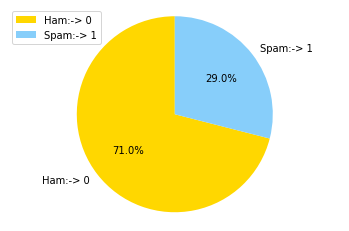

In [24]:
label_counts=df['label_num'].value_counts()
labels = ['Ham:-> 0', 'Spam:-> 1']
colors = ['gold', 'lightskyblue']

plt.pie(label_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend()
plt.show()

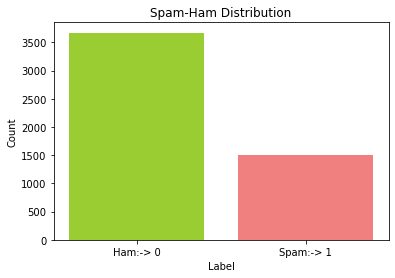

In [25]:
label_counts=df['label_num'].value_counts()
labels = ['Ham:-> 0', 'Spam:-> 1',]
colors = ['yellowgreen', 'lightcoral']

plt.bar(labels, label_counts, color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Spam-Ham Distribution')
plt.show()

## c. drop unnecessary column

In [26]:
df.drop(columns=['label','Unnamed: 0'],inplace=True)

## d. renaming the column

In [27]:
df.rename(columns={'label_num':'classification'},inplace=True)
df.head(3)

,text,classification
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0


## Advanced Feature Engineering

## e. Frequency Identification

In [28]:
!pip install nltk

### Importing nltk

In [29]:
import nltk

### No. of Charatcers in each text email

In [30]:
# fetching number of characters in each text message
df['num_of_chars']=df['text'].apply(len)

In [31]:
df.head(3)

,text,classification,num_of_chars
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524


### No. of words in each text email

In [32]:
# number of words
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head(4)

,text,classification,num_of_chars,num_of_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49


### No. of sentences in each text email

In [34]:
# number of sentences
df['num_of_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head(5)

,text,classification,num_of_chars,num_of_words,num_of_sents
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [36]:
df[['num_of_chars', 'num_of_chars', 'num_of_chars']].describe()

,num_of_chars,num_of_chars,num_of_chars
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,1048.391994,1048.391994
std,1528.513435,1528.513435,1528.513435
min,11.000000,11.000000,11.000000
25%,244.000000,244.000000,244.000000
50%,540.000000,540.000000,540.000000
75%,1237.000000,1237.000000,1237.000000
max,32258.000000,32258.000000,32258.000000


### ham emails description

In [37]:
df[df['classification']==0][['num_of_chars', 'num_of_chars', 'num_of_chars']].describe()

,num_of_chars,num_of_chars,num_of_chars
count,3672.000000,3672.000000,3672.000000
mean,977.008170,977.008170,977.008170
std,1382.827493,1382.827493,1382.827493
min,18.000000,18.000000,18.000000
25%,231.750000,231.750000,231.750000
50%,530.000000,530.000000,530.000000
75%,1227.250000,1227.250000,1227.250000
max,32258.000000,32258.000000,32258.000000


### spam emails description

In [38]:
df[df['classification']==1][['num_of_chars', 'num_of_chars', 'num_of_chars']].describe()

,num_of_chars,num_of_chars,num_of_chars
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,1223.256171,1223.256171
std,1825.986210,1825.986210,1825.986210
min,11.000000,11.000000,11.000000
25%,283.000000,283.000000,283.000000
50%,576.000000,576.000000,576.000000
75%,1253.500000,1253.500000,1253.500000
max,22073.000000,22073.000000,22073.000000


### Importing seaborn

In [39]:
import seaborn as sns

### no of chars: spam vs ham

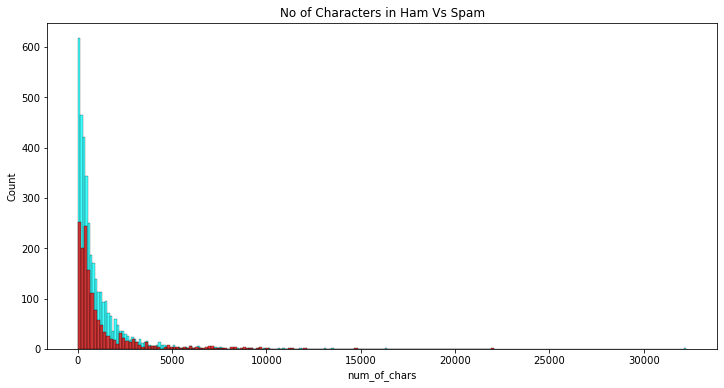

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification']==0]['num_of_chars'],color='cyan')
sns.histplot(df[df['classification']==1]['num_of_chars'],color='red')
plt.title('No of Characters in Ham Vs Spam')
plt.show()

### no of words: spam vs ham

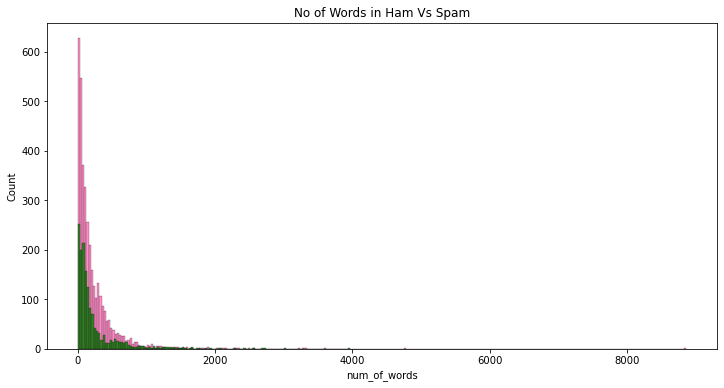

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification']==0]['num_of_words'],color='hotpink')
sns.histplot(df[df['classification']==1]['num_of_words'],color='green')
plt.title('No of Words in Ham Vs Spam')
plt.show()

### no of senteces: spam vs ham

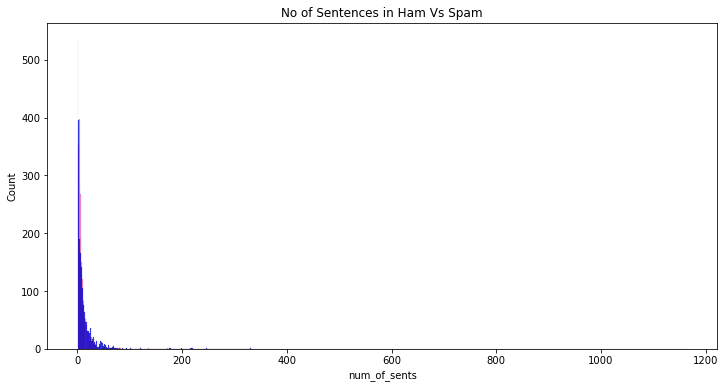

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification']==0]['num_of_sents'],color='hotpink')
sns.histplot(df[df['classification']==1]['num_of_sents'],color='blue')
plt.title('No of Sentences in Ham Vs Spam')
plt.show()

### Pairplot

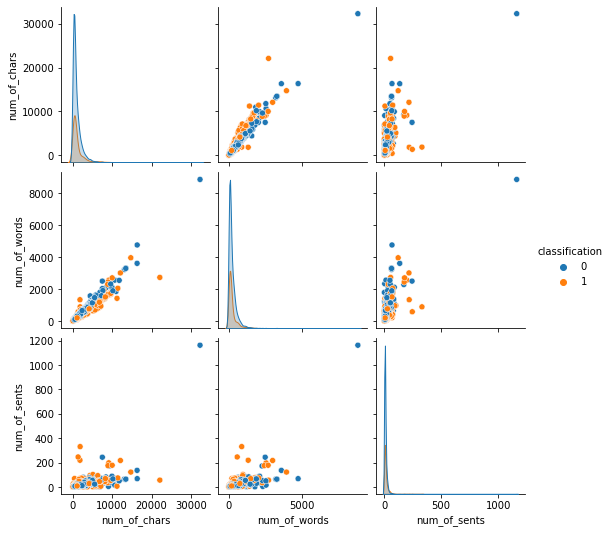

In [43]:
sns.pairplot(df,hue='classification')

## Correlation

In [44]:
df.corr()

,classification,num_of_chars,num_of_words,num_of_sents
classification,1.000000,0.073101,0.013685,0.098584
num_of_chars,0.073101,1.000000,0.970736,0.657162
num_of_words,0.013685,0.970736,1.000000,0.717772
num_of_sents,0.098584,0.657162,0.717772,1.000000


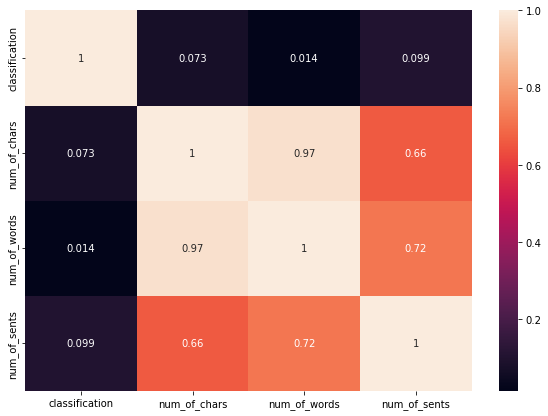

In [45]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Input Preprocessing

In [46]:
import re

## i. Hashtag Removal

In [47]:
# def hashtags_removal(text):
#     hashtags = "#[\S]+"
#     text = re.sub(hashtags,"",text)
#     return text

In [48]:
# #Remove Hashtags from dataset
# df['text'] = df['text'].apply(lambda x: hashtags_removal(x))

In [49]:
# df.sample(3)

## ii. Mentions Removal

In [50]:
# def mentions_removal(text):
#     mentions = "@[\S]+"
#     text = re.sub(mentions,"",text)
#     return text

In [51]:
# #Remove Mention from dataset
# df['text'] = df['text'].apply(lambda x: mentions_removal(x))

In [52]:
# df.sample(3)

### iii. URL Removal

In [53]:
# def url_removal(text):
#     url = "https?://[A-z0-9_%/\-\.]+[A-z0-9_\.\-\?&=%]+"
#     text = re.sub(url,"",text)
#     return text

In [54]:
# #Remove URL from dataset
# df['text'] = df['text'].apply(lambda x: url_removal(x))

In [55]:
# df.sample(3)

## iv. lowercasing

In [56]:
# # lower case each word in the texts
# df['text']=df['text'].str.lower()

In [57]:
# df.sample(2)

### importing nltk

In [58]:
import nltk

## v. stopwords removal

In [59]:
# # Import stopwords with nltk.
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

In [60]:
# stopwords.words('english')

In [61]:
# # remove stopwords from the texts
# df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [62]:
# df.sample(3)

## vi. stemming

In [63]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()

In [64]:
# def stem_sentence(sentence):
#     words = nltk.word_tokenize(sentence.lower())
#     stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
#     stemmed_sentence = " ".join(stemmed_words)
#     return stemmed_sentence

In [65]:
# # stem each word in the text
# df["text"] = df["text"].apply(stem_sentence)

In [66]:
# df.sample(5)

## vii. Punctuations Removal

In [67]:
# def punctuations_removal(text):
#     puntuations = "[\.\?!,;:]+"
#     text = re.sub(puntuations,"",text)
#     return text

In [68]:
# #Remove Punctuations from dataset
# df['text'] = df['text'].apply(lambda x: punctuations_removal(x))

In [69]:
# df.sample(4)

### Importing string

In [70]:
import string

In [71]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Stemming and Lemmatization

In [72]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [73]:
from nltk.corpus import stopwords

## Data Processing in Single Function

In [74]:
def transform_text(text):
    # lower casing
    text=text.lower()
    
    # tokenization
    text=nltk.word_tokenize(text)
    
    # removing special characters
    tmp=[]
    for i in text:
        if i.isalnum():
            tmp.append(i)

    text=tmp[:]
    tmp.clear()
    
    # removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            tmp.append(i)
            
    text=tmp[:]
    tmp.clear()
    
    # stemming 
    for i in text:
        tmp.append(ps.stem(i))
    
    return " ".join(tmp)

In [75]:
df['transformed_text']=df['text'].apply(transform_text)

In [76]:
df.head()

,text,classification,num_of_chars,num_of_words,num_of_sents,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


## WordCloud

In [77]:
from wordcloud import WordCloud

### Spam wordcloud

In [78]:
wc = WordCloud(width=2000, height=1500, min_font_size=10, background_color='white')
spam_wc=wc.generate(df[df['classification']==1]['transformed_text'].str.cat(sep=" "))

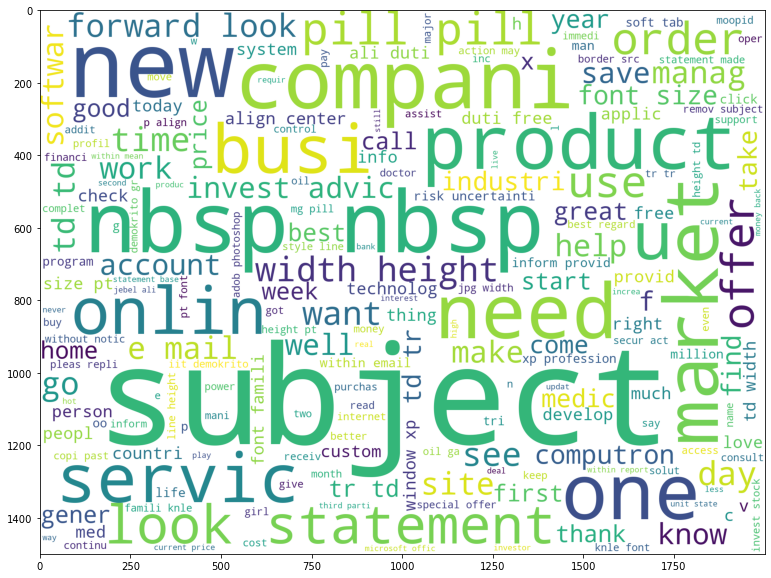

In [79]:
plt.figure(figsize=(14, 10))
plt.imshow(spam_wc)
# plt.axis('off')
plt.show()

### ham wordcloud

In [80]:
wc = WordCloud(width=2000, height=1500, min_font_size=10, background_color='black')
ham_wc=wc.generate(df[df['classification']==0]['transformed_text'].str.cat(sep=" "))

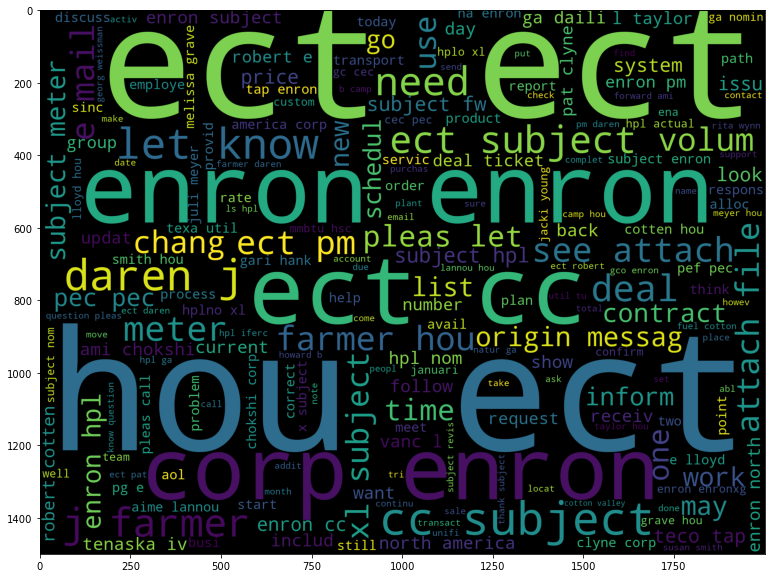

In [81]:
plt.figure(figsize=(14, 10))
plt.imshow(ham_wc)
# plt.axis('off')
plt.show()

In [82]:
df.head()

,text,classification,num_of_chars,num_of_words,num_of_sents,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


## Model Performance Evaluation with Balanced Dataset

### spam in form of list

In [83]:
# df[df['classification']==1]['transformed_text'].tolist()

### spam corpus

In [84]:
spam_corpus=[]
for msg in df[df['classification']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [85]:
len(spam_corpus)

197452

### Importing Counter

In [86]:
from collections import Counter

In [87]:
# Counter(spam_corpus)

In [88]:
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,subject,1659
1,3,1239
2,com,992
3,http,984
4,compani,918
5,2,858
6,price,732
7,1,720
8,0,698
9,e,638


### top 30 words occuring in spam messages

c:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


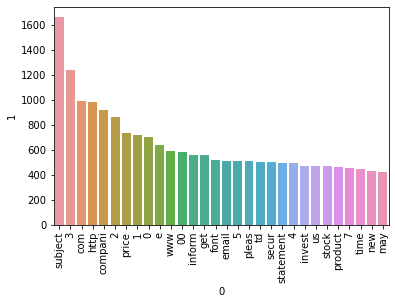

In [89]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### ham corpus

In [90]:
ham_corpus=[]
for msg in df[df['classification']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [91]:
len(ham_corpus)

388650

In [92]:
# Counter(ham_corpus)

In [93]:
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,ect,13897
1,hou,7281
2,enron,6555
3,subject,6405
4,2000,4308
5,deal,3549
6,ga,2895
7,pleas,2737
8,meter,2718
9,com,2717


### top 20 words occuring in ham messages

c:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


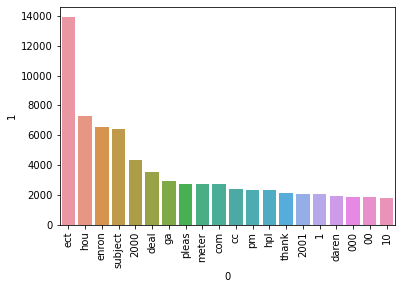

In [94]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [95]:
df.tail()

,text,classification,num_of_chars,num_of_words,num_of_sents,transformed_text
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,3,subject put 10 ft transport volum decreas 2500...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,8,subject 3 4 2000 follow nom hpl take extra 15 ...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,79,4,subject calpin daili ga nomin juli mention ear...
5169,Subject: industrial worksheets for august 2000...,0,573,112,7,subject industri worksheet august 2000 activ a...
5170,Subject: important online banking alert\r\ndea...,1,1114,200,8,subject import onlin bank alert dear valu citi...


# 06. Advanced Feature Engineering

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

## TF-IDF or Word Embeddings

In [97]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [98]:
X.shape

(5171, 3000)

In [99]:
X

array([[0.12498397, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [100]:
y=df['classification'].values

In [101]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## Splitting the Dataset into Training and Testing Sets

In [102]:
from sklearn.model_selection import train_test_split

## Dataset Splitting

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
# Print the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 4136
Testing set size: 1035


In [105]:
# Print the sizes of the training and testing labels
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 4136
Testing set size: 1035


In [106]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.43045136, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [107]:
X_test

array([[0.        , 0.03595983, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22084146, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [108]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [109]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Algorithm Implementation and Configuration

In [111]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## Model Training

In [112]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1-Score:",f1_score(y_test,y_pred1))

Accuracy: 0.9623188405797102
Confusion Matrix
[[717  29]
 [ 10 279]]
Precision: 0.9058441558441559
Recall: 0.9653979238754326
F1-Score: 0.9346733668341709


## Model Evaluation and Metrics

In [113]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2))
print("Recall:",recall_score(y_test,y_pred2))
print("F1-Score:",f1_score(y_test,y_pred2))

Accuracy: 0.9458937198067633
Confusion Matrix
[[703  43]
 [ 13 276]]
Precision: 0.8652037617554859
Recall: 0.9550173010380623
F1-Score: 0.9078947368421052


In [114]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3))
print("Recall:",recall_score(y_test,y_pred3))
print("F1-Score:",f1_score(y_test,y_pred3))

Accuracy: 0.9169082125603865
Confusion Matrix
[[690  56]
 [ 30 259]]
Precision: 0.8222222222222222
Recall: 0.8961937716262975
F1-Score: 0.857615894039735


## Model Parameter Fine-tuning

In [115]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create a grid search object
grid_search = GridSearchCV(mnb, param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_params = grid_search.best_params_

In [116]:
# Train the final model using the best parameter values
classifier_final = MultinomialNB(alpha=best_params['alpha'])
classifier_final.fit(X_train, y_train)
y_pred_tuned=classifier_final.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_tuned))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_tuned))
print("Precision:",precision_score(y_test,y_pred_tuned))
print("Recall:",recall_score(y_test,y_pred_tuned))
print("F1-Score:",f1_score(y_test,y_pred_tuned))

Accuracy: 0.9497584541062802
Confusion Matrix
[[706  40]
 [ 12 277]]
Precision: 0.8738170347003155
Recall: 0.9584775086505191
F1-Score: 0.9141914191419142


## Alternative Machine Learning Algorithms

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Algorithm Implementation and Configuration

In [118]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [119]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

# 02. Model Training and Evaluation

In [120]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [121]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9826086956521739, 0.9531772575250836)

## Model Evaluation and Metrics

In [122]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print(name,"-------------------------------------")
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)
    print("\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC -------------------------------------
Accuracy -  0.9826086956521739
Precision -  0.9531772575250836


KN -------------------------------------
Accuracy -  0.9739130434782609
Precision -  0.9678571428571429


NB -------------------------------------
Accuracy -  0.9458937198067633
Precision -  0.8652037617554859


DT -------------------------------------
Accuracy -  0.8415458937198068
Precision -  0.6456876456876457


LR -------------------------------------
Accuracy -  0.9690821256038648
Precision -  0.9269102990033222


RF -------------------------------------
Accuracy -  0.978743961352657
Precision -  0.9556313993174061


AdaBoost -------------------------------------
Accuracy -  0.9632850241545894
Precision -  0.9087947882736156


BgC -------------------------------------
Accuracy -  0.9545893719806763
Precision -  0.9006622516556292


ETC -------------------------------------
Accuracy -  0.9835748792270531
Precision -  0.9563758389261745


GBDT ---------------------------------

In [123]:
acc_pre_df=pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [124]:
acc_pre_df

,Algorithm,Accuracy,Precision
1,KN,0.973913,0.967857
8,ETC,0.983575,0.956376
5,RF,0.978744,0.955631
0,SVC,0.982609,0.953177
10,xgb,0.972947,0.927869
4,LR,0.969082,0.926910
9,GBDT,0.943961,0.911032
6,AdaBoost,0.963285,0.908795
7,BgC,0.954589,0.900662
2,NB,0.945894,0.865204


In [125]:
performance_dfv = pd.melt(acc_pre_df, id_vars = "Algorithm")

In [126]:
performance_dfv

,Algorithm,variable,value
0,KN,Accuracy,0.973913
1,ETC,Accuracy,0.983575
2,RF,Accuracy,0.978744
3,SVC,Accuracy,0.982609
4,xgb,Accuracy,0.972947
5,LR,Accuracy,0.969082
6,GBDT,Accuracy,0.943961
7,AdaBoost,Accuracy,0.963285
8,BgC,Accuracy,0.954589
9,NB,Accuracy,0.945894


## Model Performance Comparison

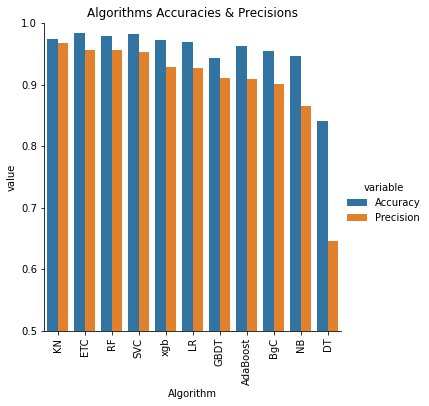

In [127]:
sns.catplot(x='Algorithm', y='value',hue='variable',data=performance_dfv,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.title('Algorithms Accuracies & Precisions')
plt.show()

## Fine-tuning Model Parameters for Improved Performance

In [128]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter search space
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': [0.001, 0.01, 0.1]
# }

# # Create an instance of the model
# model = SVC() 

# # Create a grid search object
# grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

# # Perform grid search on the training dataset
# grid_search.fit(X_train, y_train)

# # Get the best parameter values found during grid search
# best_params = grid_search.best_params_

In [129]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter search space


# param_dist = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': [0.001, 0.01, 0.1]
# }

# # Create an instance of the model
# model = SVC() 

# # Create a random search object
# random_search = RandomizedSearchCV(model, param_dist, n_iter=10, scoring='accuracy', cv=5)

# # Perform random search on the training dataset
# random_search.fit(X_train, y_train)

# # Get the best parameter values found during random search
# best_params = random_search.best_params_

In [130]:
# # Use the best parameter values to train the final model
# final_model = SVC(**best_params)
# final_model.fit(X_train, y_train)

# # Evaluate the model's performance on the test dataset
# y_pred = final_model.predict(X_test)

# # Calculate evaluation metrics
# y_pred_improved=classifier_final.predict(X_test)
# print("Accuracy:",accuracy_score(y_test,y_pred_improved))
# print("Confusion Matrix")
# print(confusion_matrix(y_test,y_pred_improved))
# print("Precision:",precision_score(y_test,y_pred_improved))
# print("Recall:",recall_score(y_test,y_pred_improved))
# print("F1-Score:",f1_score(y_test,y_pred_improved))

# 07. Ensemble Learning

In [131]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

## Ensemble Model Implementation

In [132]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('rfc', rfc), ('et', etc)],voting='soft')

In [133]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

## Model Performance Comparison

In [134]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))

Accuracy 0.9864734299516909
Precision 0.959866220735786
Confusion Matrix
[[717  29]
 [ 10 279]]
Recall: 0.9930795847750865
F1-Score: 0.9761904761904763


In [135]:
# names=['Logistic Regression','Multinomial Naive Bayes','Support Vector Machine','K Nearest Neighbour', 'Decision Tree Classification' ,'Random Forest Classification','ExtraTrees','Bagging','AdaBoost','GradientBoosting','XGB']
# acc=[lrc,mnb,svc,knc,dtc,rfc,etc,bc,abc,gbdt,xgb]

In [136]:
# plt.figure(figsize=(10, 8))
# graph = plt.barh(names, acc)
# plt.xlabel('Accuracy')
# plt.ylabel('Models')
# graph[0].set_color('green')
# graph[1].set_color('yellow')
# graph[2].set_color('red')
# graph[3].set_color('cyan')
# graph[4].set_color('gold')
# graph[5].set_color('blue')
# graph[6].set_color('hotpink')
# graph[7].set_color('black')
# graph[8].set_color('yellowgreen')
# graph[9].set_color('cyan')
# graph[10].set_color('brown')

# for i, v in enumerate(acc):
#     plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
# plt.show()

# 08. Cross-Validation and Model Selection

In [141]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_svc))
print("Precision",precision_score(y_test,y_pred_svc))
print("Recall:",recall_score(y_test,y_pred_svc))
print("F1-Score:",f1_score(y_test,y_pred_svc))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_svc))

Accuracy 0.9826086956521739
Precision 0.9531772575250836
Recall: 0.986159169550173
F1-Score: 0.9693877551020409
Confusion Matrix
[[732  14]
 [  4 285]]


## Email Classification Prediction

In [154]:
lrc = LogisticRegression(solver='lbfgs', penalty='l2')
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_lrc))
print("Precision",precision_score(y_test,y_pred_lrc))
print("Recall:",recall_score(y_test,y_pred_lrc))
print("F1-Score:",f1_score(y_test,y_pred_lrc))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lrc))

Accuracy 0.9845410628019323
Precision 0.9595959595959596
Recall: 0.986159169550173
F1-Score: 0.9726962457337883
Confusion Matrix
[[734  12]
 [  4 285]]


# 03. Model Deployment

In [143]:
import pickle

## Model Saving and Loading

In [144]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [155]:
pickle.dump(lrc,open('model.pkl','wb'))

# 04. User Interface Enhancement

# 10. Advanced Deployment and Scaling

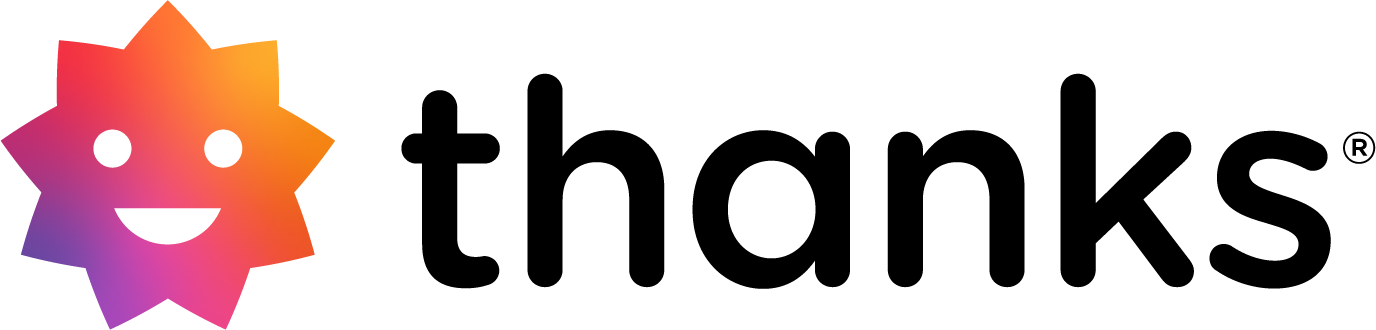